
# 2.0 Authenticating with Twitter's API


In [1]:
!pip install Twython

In [2]:
from twython import Twython, TwythonError


## 2.1 Enter app info and get auth URL


In [3]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [ ]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

In [5]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '6714058'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)


## 2.3 Use authorized tokens


In [6]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'contributors_enabled': False,
 'created_at': 'Thu Aug 26 00:17:27 +0000 2010',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'volto em breve',
 'entities': {'description': {'urls': []}},
 'favourites_count': 5070,
 'follow_request_sent': False,
 'followers_count': 171,
 'following': False,
 'friends_count': 89,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 183031171,
 'id_str': '183031171',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 1,
 'location': '',
 'name': 'julia',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': '34BFBF',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/183031171/1602630101',
 'profile_image_url': 'http://

# 6.0 Twitter retweet network



## 6.1 Get some tweets

In [11]:
import itertools


NUM_TWEETS_TO_FETCH =5000

cursor01 = twitter.cursor(twitter.search, q='cea brasil', count=100, result_type='mixed')
cursor02 = twitter.cursor(twitter.search, q='na cea', count=100, result_type='mixed')
cursor03 = twitter.cursor(twitter.search, q='da cea', count=100, result_type='mixed')
somatorio = [*cursor01, *cursor02, *cursor03]
search_tweets = list(itertools.islice(somatorio, NUM_TWEETS_TO_FETCH))

len(search_tweets)

1965

## 6.2 Filter retweets


In [12]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

442

In [13]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [14]:
df.head()

,user,date,text,favorite_count
0,luizameira,Tue Sep 14 22:58:28 +0000 2021,App da @cea_brasil é tão ruim que parece que f...,0
1,johnnyjpmendes,Tue Sep 14 22:12:01 +0000 2021,(3/5) @googlebrasil @Danone @chevroletbrasil @...,0
2,Fabianaeliass,Tue Sep 14 21:04:04 +0000 2021,@cea_brasil Continuo sem atendimento….,0
3,mjcdefreitas,Tue Sep 14 20:44:42 +0000 2021,RT @CBeninha: E amanhã é decisão! O Leão pode ...,0
4,Day_fernandes9,Tue Sep 14 20:24:02 +0000 2021,@cea_brasil libera p eu fazer o cartão sua safada,0


In [15]:
df.shape

(1965, 4)

In [16]:
df.to_csv("cea.csv")

## 6.3 Create DiGraph


In [17]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

## 6.4 Analyze graph



### 6.4.1 Most retweeted user


In [18]:
max(D.nodes, key=D.out_degree)

'Com_CHUO'

In [19]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('Com_CHUO', 15),
 ('camiliette', 11),
 ('ManuelBaltar', 10),
 ('F1RaiContext', 9),
 ('MariaVaressorca', 7)]

In [20]:
D.out_degree()

OutDegreeView({'CBeninha': 3, 'mjcdefreitas': 0, 'herson_herbster': 0, 'camisa_dezoito': 0, 'glitertomlinson': 1, 'otocarlo5': 0, 'SatoCompany': 5, 'MacGarenRX': 0, 'lifetimefreire': 5, 'rosangela46': 0, 'SarahGalegona': 0, 'QGMarquezine': 2, 'itxanacarol': 0, 'ReiConsidera': 0, 'MacGar3n': 0, 'TokuSatoOficial': 1, 'ageofasia': 0, 'Hooligans_666': 0, 'ufrrjbr': 3, 'Castro_UFRRJ': 0, 'mirsantos': 0, 'JujuArruds': 0, 'frontinsp': 5, 'FrontEndLoveBot': 0, 'verdadedecobra': 3, 'Matwerk0': 0, 'lucasuou': 0, 'ju_vianaa_': 1, 'd_nho': 0, 'Dsfg46449146': 1, 'Lucas87862483': 0, 'Vanderleialexa8': 0, 'Claudia58082949': 0, 'DeivissonGabr11': 0, 'bakainee': 1, 'YasminF78985408': 0, 'XHRomania': 1, 'BRASIL_ACABOU': 0, 'SimaraConceicao': 0, 'cgtnrussian': 1, 'mariliathe': 1, 'SanErvolino': 0, 'Kalinneaazevedo': 1, 'ragcordeiro1': 0, 'Antarcticacl': 1, 'mad_cea': 0, 'iPhonedabrubs': 1, 'CalebeBMariano': 0, 'DaanMartinss': 1, 'MarquezineIt': 1, 'withyoubrubs': 2, 'MariaVaressorca': 7, 'jujubinhafreire

In [21]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('descontinhocea', 93),
 ('descontocea', 51),
 ('lifetimefreire', 15),
 ('Com_CHUO', 15),
 ('MariaVaressorca', 14)]


### 6.4.2 Anomaly detection


In [22]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('Sonhodospess', 46),
 ('promodeamiga_', 44),
 ('descontocea', 30),
 ('descontinhocea', 18),
 ('ceapromodeamiga', 14)]

### 6.4.3 Connectivity


In [23]:
nx.is_weakly_connected(D)

False

In [24]:
nx.number_weakly_connected_components(D)

74

### 6.4.4 Drawing


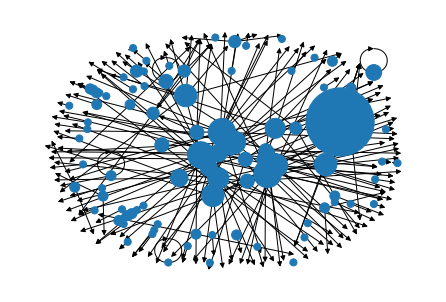

In [26]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "cea_rtt.graphml")

# 7.0 Twitter mention network



## 7.1 Get some tweets

In [28]:
import itertools

NUM_TWEETS_TO_FETCH = 5000

cursor01 = twitter.cursor(twitter.search, q='cea brasil', count=100, result_type='mixed')
cursor02 = twitter.cursor(twitter.search, q='na cea', count=100, result_type='mixed')
cursor03 = twitter.cursor(twitter.search, q='da cea', count=100, result_type='mixed')
somatorio = [*cursor01, *cursor02, *cursor03]
search_tweets = list(itertools.islice(somatorio, NUM_TWEETS_TO_FETCH))

len(search_tweets)

1965

In [30]:
search_tweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Sep 14 23:00:31 +0000 2021',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1437914183518019586',
    'indices': [117, 140],
    'url': 'https://t.co/gztsymlk89'}],
  'user_mentions': [{'id': 52055709,
    'id_str': '52055709',
    'indices': [10, 21],
    'name': 'C&A',
    'screen_name': 'cea_brasil'},
   {'id': 39570657,
    'id_str': '39570657',
    'indices': [35, 48],
    'name': 'Lojas Renner',
    'screen_name': 'Lojas_Renner'},
   {'id': 15635403,
    'id_str': '15635403',
    'indices': [70, 80],
    'name': 'Riachuelo',
    'screen_name': 'riachuelo'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1437914183518019586,
 'id_str': '1437914183518019586',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,


In [29]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

## 7.3 Analyze graph



### 7.3.1 Most  popular users


In [31]:
max(D.nodes, key=D.in_degree)

'cea_brasil'

In [32]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('cea_brasil', 256),
 ('juliette', 28),
 ('bohemiaoficial', 19),
 ('marisa1109', 19),
 ('americanascom', 17)]

In [33]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('cea_brasil', 493),
 ('descontinhocea', 93),
 ('descontocea', 51),
 ('juliette', 44),
 ('bohemiaoficial', 34)]


### 7.3.2 Conversation drivers


In [34]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('ceapromodeamiga', 122),
 ('johnnyjpmendes', 72),
 ('cea_brasil', 60),
 ('Sonhodospess', 46),
 ('promodeamiga_', 44)]

### 7.3.3 Connectivity


In [35]:
nx.is_weakly_connected(D)

False

In [36]:
nx.number_weakly_connected_components(D)

199

### 7.3.4 Drawing


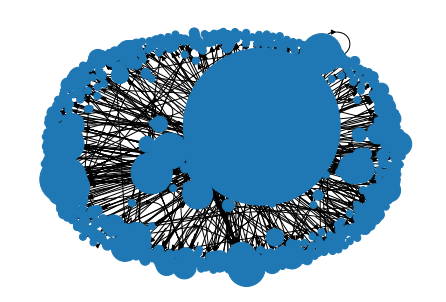

In [37]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "cea_men.graphml")